# 2019 Bay Wheels Bike Sharing Data Explonatory Visulaization
## by Rahma Mustafa

## Investigation Overview

> In this investigation, we will describe the bike ride sharing trends and user type of the bay Area bike share system. our goal to know the duration of trips and gender of users and relations between age, gender and duration

## Dataset Overview

> Our data set provides information about the Individual rides that made in a bike-sharing system that covered in the larger San Francisco Bay Area, California. The fisrt Bike share in Bay Area launched in Aguest 2013. Currently this system has more than 2000 bicycles in 262 stations. Ford GoBike system launched on 2017. This data set in 2019 , Febraury

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
bikedataframe = pd.read_csv('cleaned_data_bike_share.csv')
bikedataframe.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age_of_member,duration_in_min,week_day_name,start_time_hour,bike_share_for_all_trip_approved
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,45,26.416667,Thu,23,1
1,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,60,29.883333,Thu,23,0
2,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983,Female,No,36,19.116667,Thu,23,0
3,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6329,Subscriber,1989,Male,No,30,26.916667,Thu,23,0
4,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6548,Subscriber,1988,Other,No,31,26.166667,Thu,23,0


In [45]:
def count_plot(x,hue, palette,xlabel=None,ylabel=None):
    sb.countplot(x=x, hue=hue, palette = palette);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);

In [51]:
def point_plot(x,y,hue,xlabel=None,ylabel=None,title=None):
    sb.pointplot(data=bikedataframe, x=x, y=y, hue=hue, dodge=0.5, linestyles="");
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title);

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Trip Duration (min) )

> The range of duration in first figure was very large so we need to reduce it with log scale to be normall disrubtion like second figure

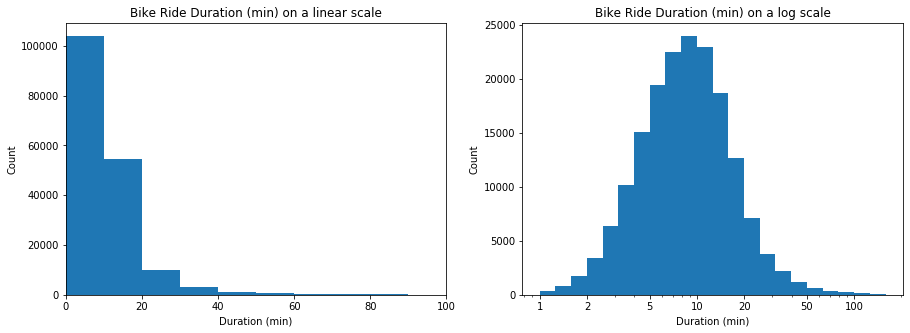

In [29]:
plt.figure(figsize = [15, 5]);

plt.subplot(1, 2, 1)
maxx=bikedataframe['duration_in_min'].max()
bins = np.arange(0, maxx+10, 10)
plt.hist(data = bikedataframe, x = 'duration_in_min', bins=bins);
plt.xlim(0,100)
plt.xlabel("Duration (min)");
plt.ylabel("Count");
plt.title("Bike Ride Duration (min) on a linear scale");

plt.subplot(1, 2, 2)
maxx=np.log10(bikedataframe['duration_in_min'].max())
bins = 10 ** np.arange(0, maxx+0.1, 0.1)
plt.hist(data = bikedataframe, x = 'duration_in_min', bins = bins);
plt.xscale('log');
loc=[1, 2, 5, 10, 20, 50, 100]
plt.xticks(loc,loc);
plt.xlabel('Duration (min)');
plt.ylabel('Count');
plt.title("Bike Ride Duration (min) on a log scale");

## Members Age
> now we distribute the age of members normally using Log scale. Age range between 20 to 50 years

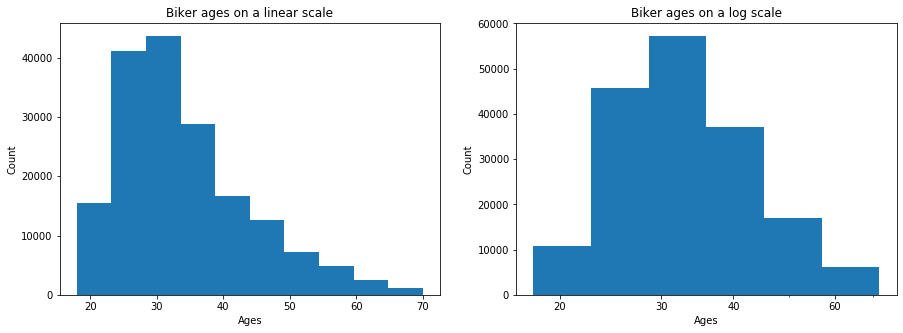

In [22]:
plt.figure(figsize = [15, 5]);

plt.subplot(1, 2, 1)
plt.hist(bikedataframe['age_of_member']);
plt.xlabel('Ages');
plt.ylabel('Count');
plt.title("Biker ages on a linear scale");


plt.subplot(1, 2, 2)
minn=np.log10(bikedataframe['age_of_member'].min())
maxx=np.log10(bikedataframe['age_of_member'].max())
bins_age = 10 ** np.arange(minn, maxx+0.1, 0.1)
plt.hist(data = bikedataframe, x = 'age_of_member', bins = bins_age);
plt.xscale('log');
xloc=[20,30,40, 60]
plt.xticks(xloc,xloc);
plt.xlabel('Ages');
plt.ylabel('Count');
plt.title("Biker ages on a log scale");

## Day/Hour of weeks and biker type visualization:

> - Male bikers are more than female bikers
> - the customers ride trips in all days in week in the same range, in comprison to subscriber ride in week work days more than weekends
> - During normal rush hours, when people are going to work in the morning and getting off work in the afternoon, subscriber usage visibly surges.Customers who ride in the day did not exhibit a similar pattern.

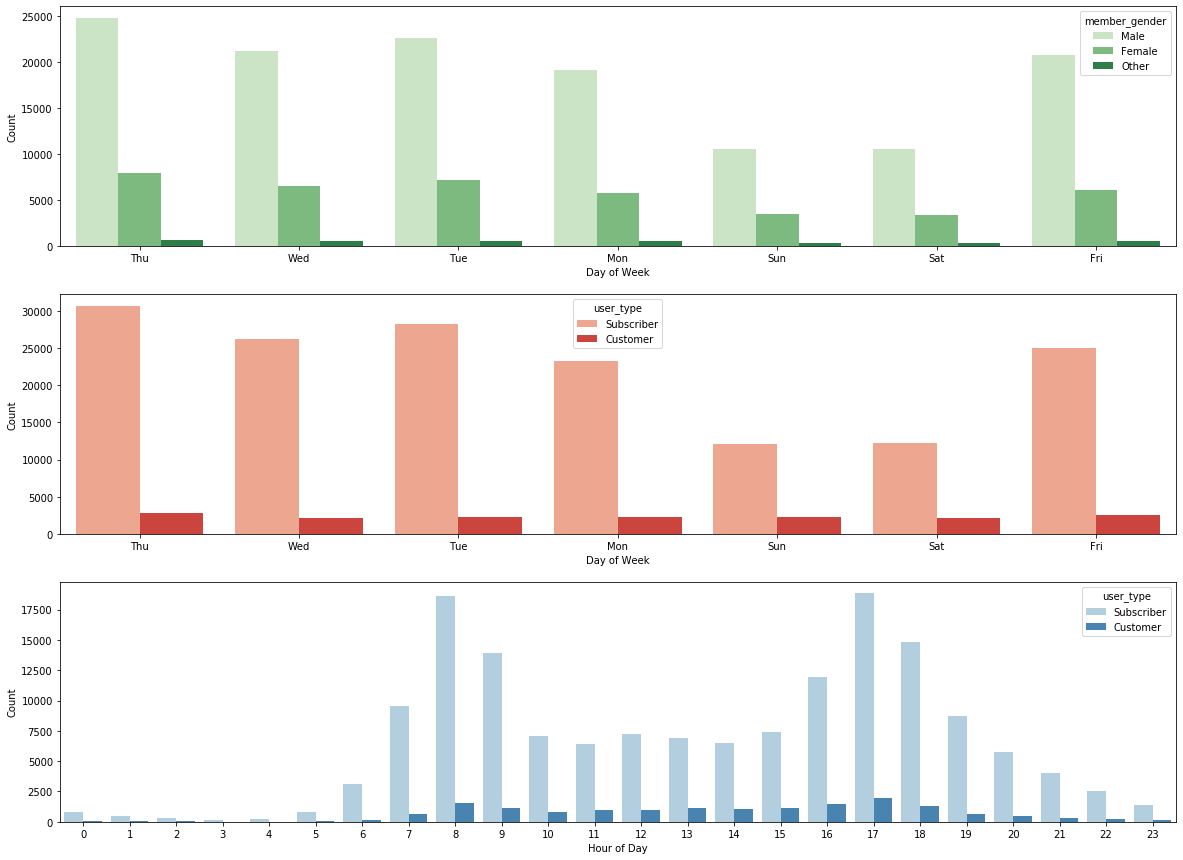

In [48]:
plt.figure(figsize = [20, 15]);

plt.subplot(3, 1, 1)
count_plot(x=bikedataframe['week_day_name'], hue=bikedataframe['member_gender'], palette = 'Greens',xlabel='Day of Week',
ylabel='Count' );


plt.subplot(3, 1, 2);
count_plot(x=bikedataframe['week_day_name'], hue=bikedataframe['user_type'], palette = 'Reds',xlabel='Day of Week',
ylabel='Count' );
plt.subplot(3, 1, 3);
count_plot(x=bikedataframe['start_time_hour'], hue=bikedataframe['user_type'], palette = 'Blues',xlabel='Hour of Day',
ylabel='Count' );


## Duration/Hour trips that use from Males and Females also Customers and Subscribers during weekdays
> - Duration time increases every saturday and sunday thats mean the users riding trips more times in weekends.
> - Females ride trips longer than males. A lot of users don't clairfy their gender
> - The customers ride trips in weekends more than the rest of day to get fun, in comprison to subscriber ride in week work days more than weekends
> - Females bikers ride earlier than males biker
> - Customers ride trips longer than Subscribers, huge difference.
> - the subscribers are older than customers. In weekends the bikers smaller than bikers in the rest of day



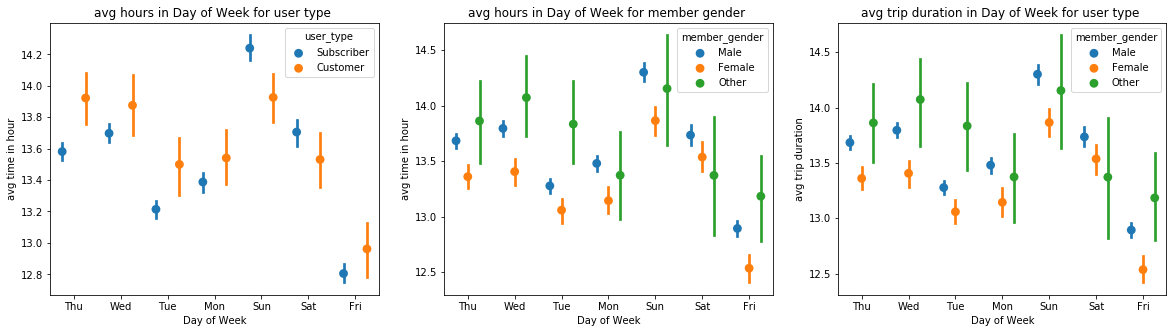

In [52]:
plt.figure(figsize = [20, 5]);

plt.subplot(1, 3, 1);
point_plot(x='week_day_name', y='start_time_hour', hue='user_type',xlabel='Day of Week',
ylabel='avg time in hour',title='avg hours in Day of Week for user type ');

plt.subplot(1,3, 2);

point_plot(x='week_day_name', y='start_time_hour', hue='member_gender',xlabel='Day of Week',
ylabel='avg time in hour',title='avg hours in Day of Week for member gender ');


plt.subplot(1, 3,3);
point_plot(x='week_day_name', y='start_time_hour', hue='member_gender',xlabel='Day of Week',
ylabel='avg trip duration',title='avg trip duration in Day of Week for user type ');



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!